# Cashflow Annualized interest model

In [1]:
import pandas as pd
import numpy_financial as npf
import matplotlib.pyplot as plt
from collections import namedtuple

In [2]:
# loan characteristics
original_balance = 500000
coupon = 0.08
term = 120

# payments
periods = range(1, term+1)
interest_payment = npf.ipmt(
    rate=coupon / 12, per=periods, nper=term, pv=-original_balance)
principal_payment = npf.ppmt(
    rate=coupon / 12, per=periods, nper=term, pv=-original_balance)

In [4]:
principal_payment

array([2733.04638443, 2751.26669366, 2769.60847162, 2788.0725281 ,
       2806.65967829, 2825.37074281, 2844.20654776, 2863.16792475,
       2882.25571091, 2901.47074898, 2920.81388731, 2940.28597989,
       2959.88788642, 2979.62047233, 2999.48460882, 3019.48117288,
       3039.61104736, 3059.87512101, 3080.27428848, 3100.80945041,
       3121.48151341, 3142.29139017, 3163.23999943, 3184.3282661 ,
       3205.5571212 , 3226.92750201, 3248.44035202, 3270.09662104,
       3291.89726518, 3313.84324695, 3335.93553526, 3358.17510549,
       3380.56293953, 3403.10002579, 3425.7873593 , 3448.6259417 ,
       3471.61678131, 3494.76089318, 3518.05929914, 3541.5130278 ,
       3565.12311465, 3588.89060208, 3612.81653943, 3636.90198302,
       3661.14799624, 3685.55564955, 3710.12602055, 3734.86019402,
       3759.75926198, 3784.82432373, 3810.05648588, 3835.45686246,
       3861.02657487, 3886.76675204, 3912.67853039, 3938.76305392,
       3965.02147428, 3991.45495078, 4018.06465045, 4044.85174

In [5]:
npf.pmt(coupon, term, -original_balance,0,when = 'end')

40003.90168040734

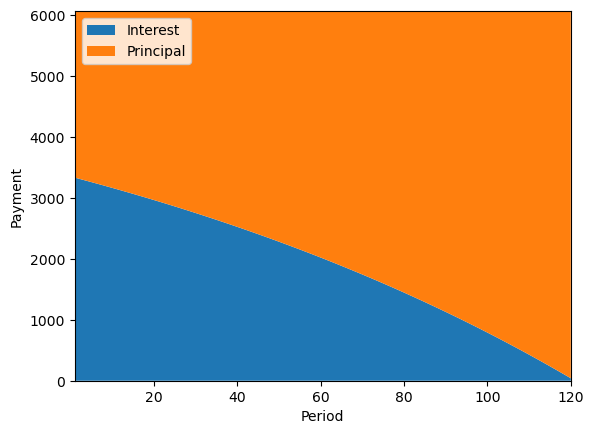

In [6]:
plt.stackplot(periods, interest_payment, principal_payment, 
              labels=['Interest', 'Principal'])
plt.legend(loc='upper left')
plt.xlabel("Period")
plt.ylabel("Payment")
plt.margins(0, 0)

In [6]:
_# pandas float formatting_
pd.options.display.float_format = '{:,.2f}'.format

_# cash flow table_
cf_data = {'Interest': interest_payment, 'Principal': principal_payment}
cf_table = pd.DataFrame(data=cf_data, index=periods)
cf_table['Payment'] = cf_table['Interest'] + cf_table['Principal']
cf_table['Ending Balance'] = original_balance - \
                             cf_table['Principal'].cumsum()
cf_table['Beginning Balance'] = [original_balance] + \
                                list(cf_table['Ending Balance'])[:-1]
cf_table = cf_table[['Beginning Balance', 'Payment', 'Interest', 
                     'Principal', 'Ending Balance']]
cf_table.head(8)

,Beginning Balance,Payment,Interest,Principal,Ending Balance
1,"500,000.00","6,066.38","3,333.33","2,733.05","497,266.95"
2,"497,266.95","6,066.38","3,315.11","2,751.27","494,515.69"
3,"494,515.69","6,066.38","3,296.77","2,769.61","491,746.08"
4,"491,746.08","6,066.38","3,278.31","2,788.07","488,958.01"
5,"488,958.01","6,066.38","3,259.72","2,806.66","486,151.35"
6,"486,151.35","6,066.38","3,241.01","2,825.37","483,325.98"
7,"483,325.98","6,066.38","3,222.17","2,844.21","480,481.77"
8,"480,481.77","6,066.38","3,203.21","2,863.17","477,618.60"


#### Loan payments

In [7]:
pv = 300000
r = 0.04
term = 360

for month in range(1,term + 1 ):
    pmt = f"{npf.pmt(r/12,term, -pv):,.2f}"
    ipmt = f"{npf.ipmt(r/12,month,term, -pv):,.2f}"
    ppmt = f"{npf.ppmt(r/12,month,term, -pv):,.2f}"    
    print(f"{month:8} {pmt:15} {ipmt:15} {ppmt:15}")
    



       1 1,432.25        1,000.00        432.25         
       2 1,432.25        998.56          433.69         
       3 1,432.25        997.11          435.13         
       4 1,432.25        995.66          436.58         
       5 1,432.25        994.21          438.04         
       6 1,432.25        992.75          439.50         
       7 1,432.25        991.28          440.96         
       8 1,432.25        989.81          442.43         
       9 1,432.25        988.34          443.91         
      10 1,432.25        986.86          445.39         
      11 1,432.25        985.37          446.87         
      12 1,432.25        983.88          448.36         
      13 1,432.25        982.39          449.86         
      14 1,432.25        980.89          451.36         
      15 1,432.25        979.39          452.86         
      16 1,432.25        977.88          454.37         
      17 1,432.25        976.36          455.88         
      18 1,432.25        974.84

##### Base Point Value 
#### Interest rate sensitivity


In [ ]:
Fv
rate
years
coupon

In [25]:
def pv(face_value, annual_interest, period_years, coupon_rate, pv_rate):
    coupon_payment = coupon_rate * face_value
    price_actual = npf.pv(annual_interest, period_years, coupon_payment, face_value) * -1
    
    price_up = npf.pv(annual_interest + pv_rate/10000, period_years, coupon_payment, face_value) * -1
    price_down = npf.pv(annual_interest - pv_rate/10000, period_years, coupon_payment, face_value) * -1
    print(f"Actual bond price is: {price_actual:,.4f}")
    print(f"Bond price when rate is going up: {price_up:,.4f}")
    print(f"Bond price when rate is going down: {price_down:,.4f}")

In [26]:
pv(100,0.14045,4 ,.1426,1)

Actual bond price is: 100.6259
Bond price when rate is going up: 100.5966
Bond price when rate is going down: 100.6551
